# Hello!! :)

In [11]:
import gudhi #### TDA package
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from itertools import combinations
import numpy as np
import pandas as pd
import os
from scipy.spatial import Delaunay
from matplotlib.collections import LineCollection, PolyCollection

## Below are the code for part i

In [12]:
def generate_noisy_circle(n=200, radius=1, center=(0, 0), noise_std=0.1):
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=n)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx, cy = center
    base = np.column_stack([cx + radius * ux, cy + radius * uy])
    noise = np.random.rand(n,2)
    points = base + noise_std*radius*noise
    return points

def generate_concentric_noisy_circle(n=200, radius1=1, radius2=2, center=(0, 0), noise_std=0.1):
    points1 = generate_noisy_circle(n//2, radius1, center, noise_std)
    points2 = generate_noisy_circle(n//2, radius2, center, noise_std)
    points = np.vstack([points1, points2])
    return points

def generate_offset_noisy_circle(n=200, radius=1, dist=1, center=(0, 0), noise_std=0.1):
    cx, cy = center
    center1 = (cx - dist/2 - radius, cy)
    points1 = generate_noisy_circle(n//2, radius, center1, noise_std)
    center2 = (cx + dist/2 + radius, cy)
    points2 = generate_noisy_circle(n//2, radius, center2, noise_std)
    points = np.vstack([points1, points2])
    return points

def generate_adjacent_noisy_circle(n=200, radius=1, noise_std=0.1):
    return generate_offset_noisy_circle(n, radius, 0, (0, 0), noise_std)

def generate_datasets(noise_std=0.1):
    concentric_dataset = [generate_concentric_noisy_circle(noise_std=noise_std) for i in range(100)]
    disjoint_dataset = [generate_offset_noisy_circle(noise_std=noise_std) for i in range(100)]
    adjacent_dataset = [generate_adjacent_noisy_circle(noise_std=noise_std) for i in range(100)]

    dataset = {
        'concentric': concentric_dataset,
        'disjoint': disjoint_dataset,
        'adjacent': adjacent_dataset
    }

    print("Dataset generated successfully!")
    #print(f"Total point clouds: {len(concentric_dataset) + len(disjoint_dataset) + len(adjacent_dataset)}")
    #print(f"Points per cloud: 200")
    return dataset

def plot_point_cloud(dataset):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot concentric circles
    axes[0].scatter(dataset['concentric'][0][:, 0], dataset['concentric'][0][:, 1], s=20, alpha=0.6)
    axes[0].set_title('Concentric Circles')
    axes[0].set_aspect('equal')
    axes[0].grid(True, alpha=0.3)

    # Plot disjoint circles
    axes[1].scatter(dataset['disjoint'][0][:, 0], dataset['disjoint'][0][:, 1], s=20, alpha=0.6)
    axes[1].set_title('Disjoint Circles')
    axes[1].set_aspect('equal')
    axes[1].grid(True, alpha=0.3)

    # Plot adjacent circles
    axes[2].scatter(dataset['adjacent'][0][:, 0], dataset['adjacent'][0][:, 1], s=20, alpha=0.6)
    axes[2].set_title('Adjacent Circles')
    axes[2].set_aspect('equal')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

## Below are code for Part ii

In [13]:
def compute_PH(points, title="Point Cloud"):
    alpha_complex = gudhi.AlphaComplex(points=points)
    st_a = alpha_complex.create_simplex_tree()
    st_a.compute_persistence()
    PH_alpha = st_a.persistence()
    ax = gudhi.plot_persistence_barcode(PH_alpha, legend=True)
    ax.set_title("Alpha Complex Persistence Barcode for " + title)
    plt.show()
    #return PH_alpha

## Run part i and part ii

Dataset generated successfully!


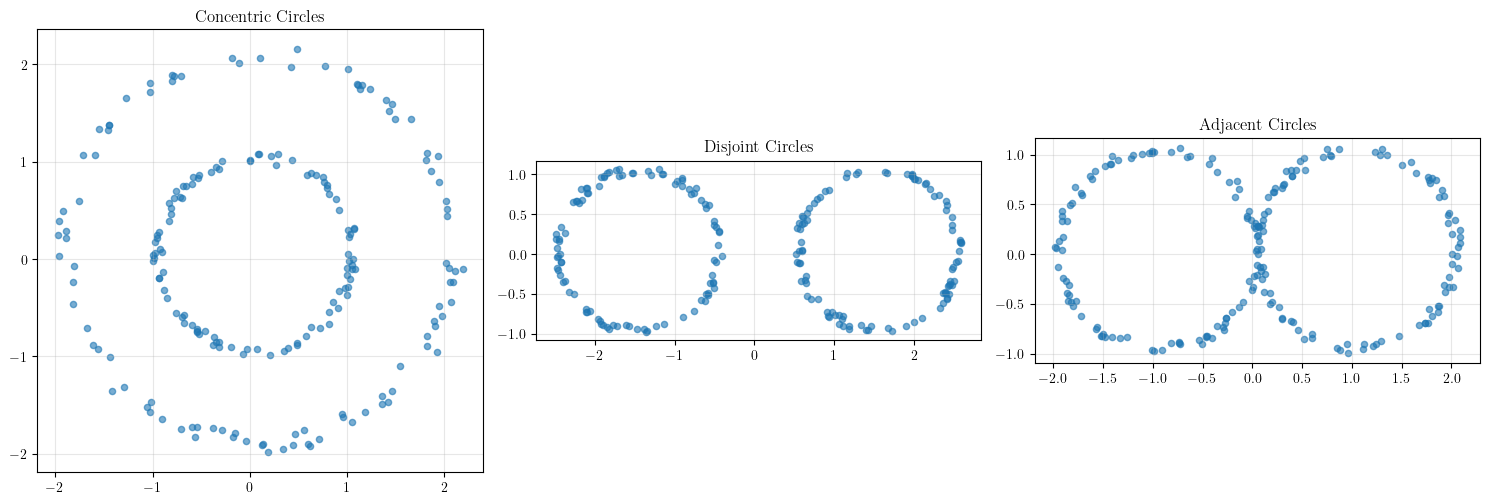

In [14]:
dataset = generate_datasets()
plot_point_cloud(dataset)

Here are the examples of one barcode for each class of point clouds

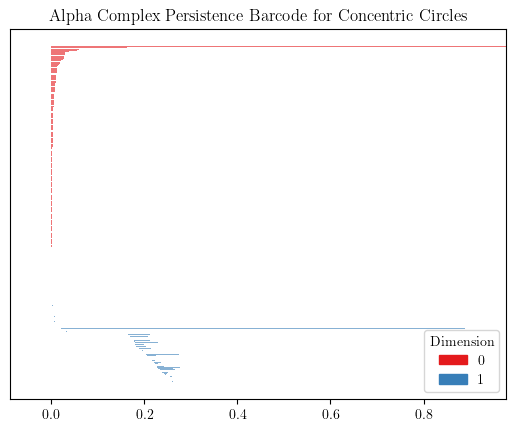

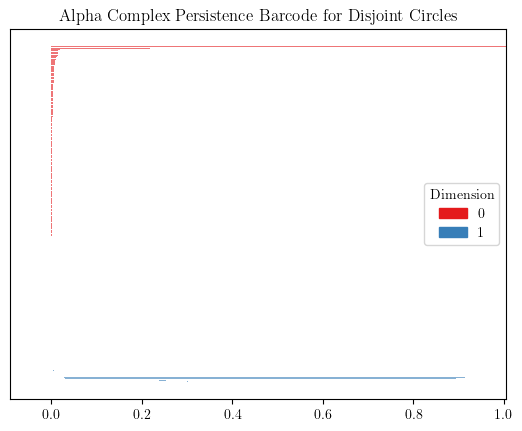

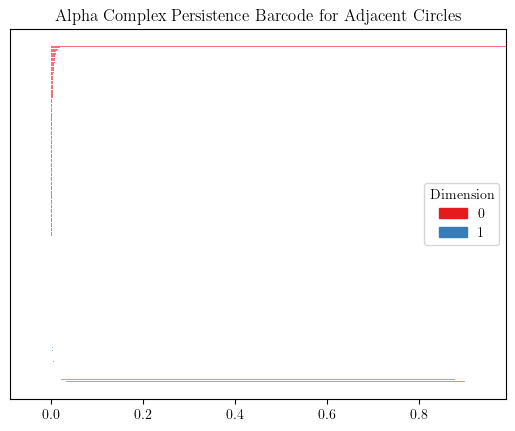

In [15]:
compute_PH(dataset['concentric'][0], title="Concentric Circles")
compute_PH(dataset['disjoint'][0], title="Disjoint Circles")
compute_PH(dataset['adjacent'][0], title="Adjacent Circles")

The main difference that we can tell Concentric Circles apart from the other two is that there is only one long interval in the dimension 1 barcode and there are also more smaller intervals in dimension 1, I think it is because the radius of the bigger circle is larger than the others which causing the points on the large circle mpre sparse.

The main difference that we can tell Disjoint circles and Adjacent circles is in dimension 0 barcode there are 2 longer intervals in disjoint circles while there is only one in Adjacent circles.

If I had the time it would be great if I can try point clouds with different radius so that we can kind of contral the density of points in the larger circle but unfortunately I don't have enough time.. :(

## Run part iii

Dataset generated successfully!


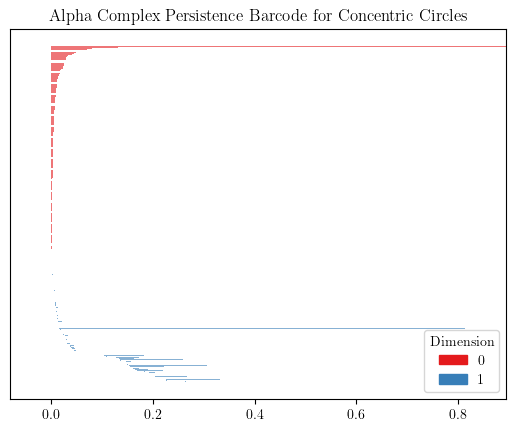

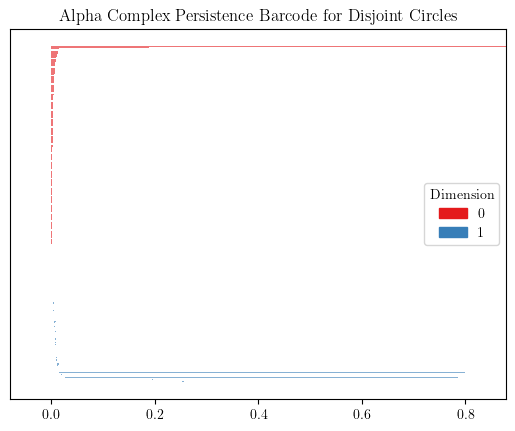

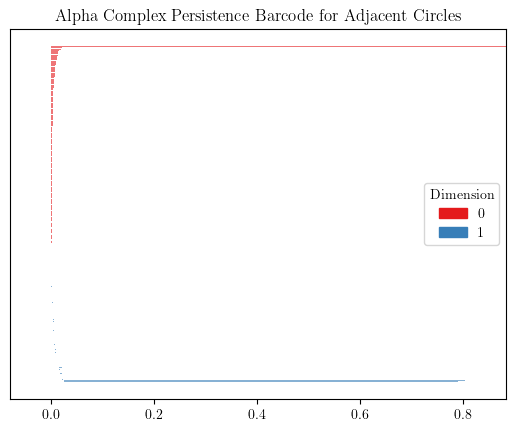

In [16]:
dataset = generate_datasets(noise_std=0.2)
compute_PH(dataset['concentric'][0], title="Concentric Circles")
compute_PH(dataset['disjoint'][0], title="Disjoint Circles")
compute_PH(dataset['adjacent'][0], title="Adjacent Circles")

Dataset generated successfully!


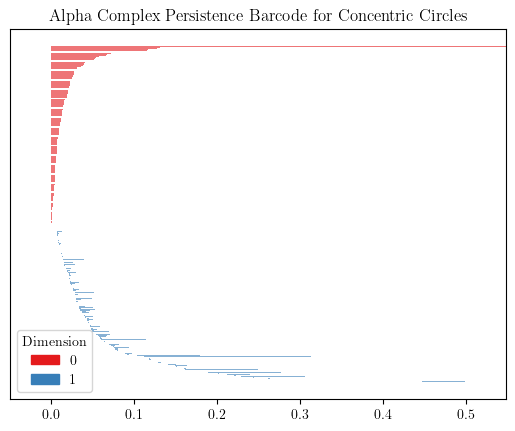

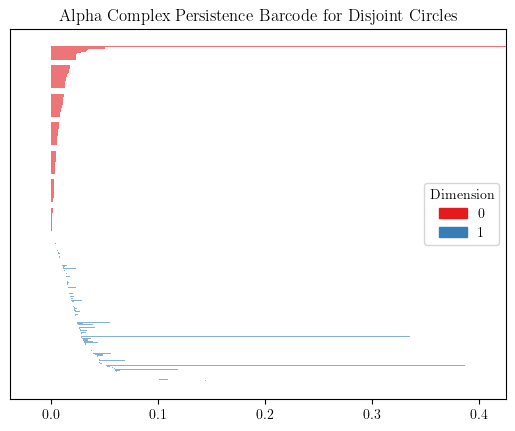

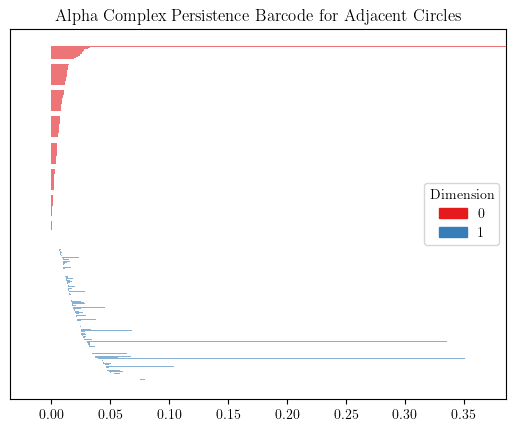

In [17]:
dataset = generate_datasets(noise_std=0.8)
compute_PH(dataset['concentric'][0], title="Concentric Circles")
compute_PH(dataset['disjoint'][0], title="Disjoint Circles")
compute_PH(dataset['adjacent'][0], title="Adjacent Circles")

Dataset generated successfully!


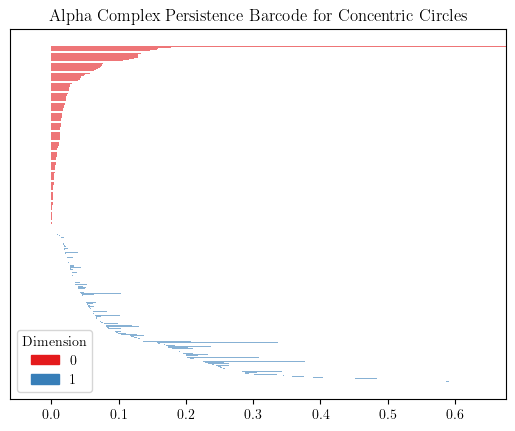

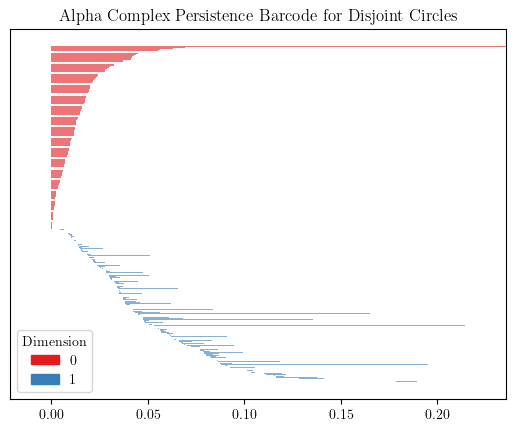

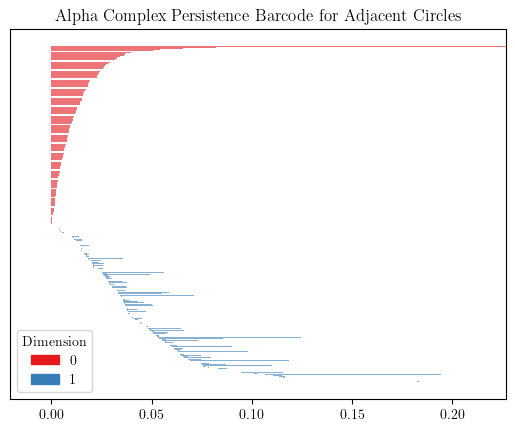

In [18]:
dataset = generate_datasets(noise_std=1.5)
compute_PH(dataset['concentric'][0], title="Concentric Circles")
compute_PH(dataset['disjoint'][0], title="Disjoint Circles")
compute_PH(dataset['adjacent'][0], title="Adjacent Circles")

Dataset generated successfully!


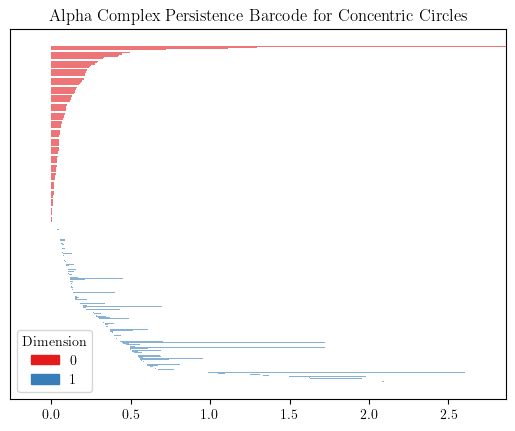

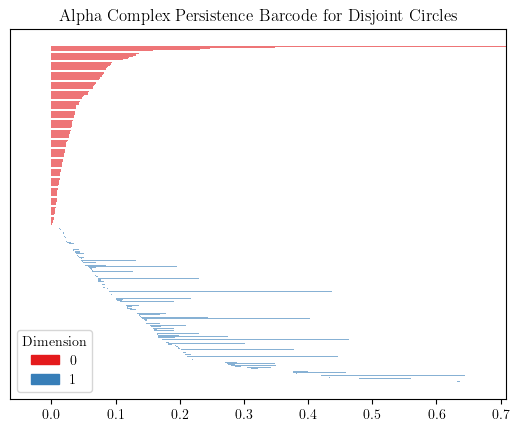

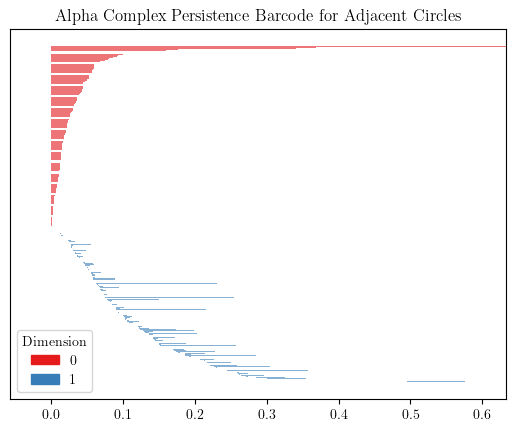

In [19]:
dataset = generate_datasets(noise_std=5)
compute_PH(dataset['concentric'][0], title="Concentric Circles")
compute_PH(dataset['disjoint'][0], title="Disjoint Circles")
compute_PH(dataset['adjacent'][0], title="Adjacent Circles")

We can see if we increase the noice, then more smaller intervals in dimension 1 barcode are generated and at some point it will be very hard for us to read off information from the barcode.

Note: It would be probably better if we can generate these using a loop and put all the barcode together and compare.